In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Library

In [2]:
cd /content/drive/MyDrive/Todays_Chatbot/Preprocessing

/content/drive/.shortcut-targets-by-id/1yQ-EFTAnZETmcDATUTjJGzUXrx_KmHG_/Todays_Chatbot/Preprocessing


In [3]:
# !git clone https://github.com/ssut/py-hanspell.git

In [4]:
cd py-hanspell

/content/drive/.shortcut-targets-by-id/1yQ-EFTAnZETmcDATUTjJGzUXrx_KmHG_/Todays_Chatbot/Preprocessing/py-hanspell


In [5]:
# 수정한 hanspell 불러오기
from hanspell import spell_checker
from hanspell.constants import CheckResult

In [6]:
cd ..

/content/drive/.shortcut-targets-by-id/1yQ-EFTAnZETmcDATUTjJGzUXrx_KmHG_/Todays_Chatbot/Preprocessing


In [7]:
# !pip install kss

In [8]:
import numpy as np
import pandas as pd
# import kss
import re
from tqdm.notebook import tqdm
from hanspell import spell_checker
import os
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Load Data

In [9]:
import os

review_path = '/content/drive/MyDrive/Todays_Chatbot/Crawling/data/review'
review_list = os.listdir(review_path)

In [ ]:
review_list[:5]

['review_388715.npy',
 'review_379255.npy',
 'review_209749.npy',
 'review_307472.npy',
 'review_22282.npy']

In [ ]:
review = np.load(review_path+'/'+review_list[0], allow_pickle=True)

In [ ]:
df = pd.DataFrame(review, columns=['created_at', 'writer_id', 'praise_count',
                               'prod_id', 'prod_name', 'prod_opt',
                               'comment', 'image_url'])

In [ ]:
df[:5]

,created_at,writer_id,praise_count,prod_id,prod_name,prod_opt,comment,image_url
0,2017.09.10,957634,1510,388715,[쿠폰할인] 순수원목 A사이드테이블 3colors,상품명: A사이드테이블 / 색상: 우드,제가 발주한 2개 중 2개 모두 아쉬운점이 있었어요... \n화이트 스탭 스툴은 일...,
1,2019.02.25,3293434,826,388715,[쿠폰할인] 순수원목 A사이드테이블 3colors,상품명: A사이드테이블 / 색상: 우드,아이고 주인님이 좋아하신다니 정말 다행입니다 감사합니다,https://image.ohou.se/image/resize/bucketplace...
2,2019.03.07,2779603,556,388715,[쿠폰할인] 순수원목 A사이드테이블 3colors,상품명: A사이드테이블 / 색상: 우드,"예뻐용!! 멍뭉이때매 예쁘게 꾸며놓지는 못해찌만,,,",https://image.ohou.se/image/resize/bucketplace...
3,2019.03.11,779772,518,388715,[쿠폰할인] 순수원목 A사이드테이블 3colors,상품명: A사이드테이블 / 색상: 우드,유리라서 그런지 고양이가 매일 올라가있오요,https://image.ohou.se/image/resize/bucketplace...
4,2019.07.17,1663207,247,388715,[쿠폰할인] 순수원목 A사이드테이블 3colors,상품명: A사이드테이블 / 색상: 우드,고양이 옹동이 관찰용인가요? 넘좋군요 새로운용도 발견...ㅎ 조립하는거 너무힘들었어...,https://image.ohou.se/image/resize/bucketplace...


## 전처리

In [ ]:
rev = df['comment'].to_numpy()

In [ ]:
rev

array(['제가 발주한 2개 중 2개 모두 아쉬운점이 있었어요... \n화이트 스탭 스툴은 일단 목재가 까져서 찍힌자국이 군데군데 있었어요... 저렴한가격이라 납득 했지만 ㅜㅜ 흰색이라 티도 많이납니다ㅠㅠ \n두번째 A사이드테이블은 ... 정말 문제라고 생각합니다\n정말 만들다가 다칠뻔한적은 처음입니다 ㅠㅠ \n일단 배송된 유리부터 우리가루가 떨어지고 테두리 마감도 엉망 ㅠㅠ 만들다가 긁히고.. 무엇보다 큰문제는 다리들이 서로 맞지않아서 정말 가구가 휘어져서 조립되고 유리는 아예 들어가지도 않습니다... 추후에 전화주셔서 일부 부속을 주셔서 기쁜마음으로 다시 했으나 역시나 불가능... \n\n의아했습니다 ... 결국 유리 포기하고 하단부분을 상단에 올려서 활용하기로 했습니다... 정말 오늘의집통해서 많은 상품을 구매하는데 이렇게 검수가 안되었거나... 위험하거나...실망한 상품은 없었던 것 같아요...가격이 저렴하니까 모두 그러려니 하지만... 아예 조립이안되고 위함한 상품을 점검없이 보내시는 것은 잘못되었다고 생각합니다 ',
       '아이고 주인님이 좋아하신다니 정말 다행입니다 감사합니다', '예뻐용!! 멍뭉이때매 예쁘게 꾸며놓지는 못해찌만,,, ',
       ..., '좋아요!!!색감이나디자인 사진그대로입니다',
       '디자인이나 배송등은 좋았습니다.\n다만 유리에 기스가 좀 있네요.',
       '생각했던것보다 별로예요....싼가격에 그냥 써요.....블랙 구입했는데 부분부분...페인트 벗겨져서 왔어요.......조립하다가 봐서 그냥 쓰기로 했어요.'],
      dtype=object)

### 한글&숫자만 남기고 제거 / hanspell 맞춤법

In [10]:
def text_cleaning(texts): # 수정완료
    # 한국어를 제외한 글자를 제거하는 패턴.
    corpus = []
    for i in range(0, len(texts)):
      reviews = re.sub("[\{\}\[\]\/?.,;:|\)*~`!^\-_+<>@\#$%&\\\=\(\'\"]", " ", str(texts[i])) #특수문자를 제거하는 패턴
      reviews = re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣 |0-9|]", " ", reviews)
      reviews = re.compile('[|ㄱ-ㅎ|ㅏ-ㅣ]+').sub(' ', reviews) # 자음, 모음만 있는 경우

      reviews = re.sub(r"^\s+", '', reviews) #remove space from start
      reviews = re.sub(r'\s+$', '', reviews) #remove space from the end
      
      reviews = re.sub(r'\s+', ' ', reviews) #remove extra space

      corpus.append(reviews)
    return corpus

In [11]:
def hanspell_(texts):
  spell_check = []
  for line in texts:
    #print(line)
    spell = spell_checker.check(line).checked
    #print(spell_checker.check(line))
    #print(spell)
    spell_check.append(spell)
  
  return spell_check

In [12]:
for review in tqdm(review_list[28:15:-1]):
    # 불러오기
    rev = np.load(review_path+'/'+review, allow_pickle=True)
    df = pd.DataFrame(rev, columns=['created_at', 'writer_id', 'praise_count',
                               'prod_id', 'prod_name', 'prod_opt',
                               'comment', 'image_url'])
    
    # text cleaning
    com = df['comment'].to_numpy()
    com_clean = text_cleaning(com)

    # spell checking
    com_spellcheck = hanspell_(com_clean)
    com = com_spellcheck

    # 내보내기
    df['comment_spellcheck'] = com
    df.to_csv('/content/drive/MyDrive/Todays_Chatbot/Preprocessing/data/review_spellcheck/'+review.split('.')[0]+'_spellcheck.csv', index=False)

KeyboardInterrupt: ignored

### maxlen 확인

한글&숫자 남기기/hanspell 전후 비교

In [13]:
review_path = '/content/drive/MyDrive/Todays_Chatbot/Preprocessing/data/review_spellcheck'
review_list = os.listdir(review_path)

In [14]:
len(review_list), review_list[:5]

(145,
 ['review_159367_spellcheck.csv',
  'review_116923_spellcheck.csv',
  'review_185683_spellcheck.csv',
  'review_36510_spellcheck.csv',
  'review_494676_spellcheck.csv'])

In [ ]:
# 전체 파일 내 comment 불러오기
before_ = np.empty([1,])
after_ = np.empty([1,])

for i in range(len(review_list)):
    review = pd.read_csv(review_path+'/'+review_list[i])
    before_ = np.concatenate((before_,review['comment']),axis=0)
    after_ = np.concatenate((after_,review['comment_spellcheck']),axis=0)

# 임의로 넣은 1.0 삭제 후 str으로 변환
before_ = before_[1:].astype(str)
after_ = after_[1:].astype(str)

In [ ]:
before_.shape, after_.shape

((999672,), (999672,))

In [ ]:
before_[:5], after_[:5]

(array(['건전지도 들어있어서 좋았고 무게 측정 잘 됩니다 실물 예뻐요', '배송은 9일정도 걸렷고 작동은 잘되네용 ㅎㅎ',
        '배송은 조금 늦었지만 깔끔하니 마음에 들어요^^\n',
        '체중과 함께 지방. 근육량등 자세히 알려주니 다이어트 욕구가 샘솟습니당',
        '일단 진짜 깔끔하게 생겼습니당 ㅋㅋ 인테리어 해치지도 않구 인바디 나오는 것도 나름 도움되네요~'],
       dtype='<U2158'),
 array(['건전지도 들어있어서 좋았고 무게 측정 잘 됩니다 실물 예뻐요', '배송은 9일 정도 걸렸고 작동은 잘 되네요',
        '배송은 조금 늦었지만 깔끔하니 마음에 들어요',
        '체중과 함께 지방 근육량 등 자세히 알려주니 다이어트 욕구가 샘솟습니다',
        '일단 진짜 깔끔하게 생겼습니다  인테리어 해치지도 않고 인바디 나오는 것도 나름 도움 되네요'],
       dtype='<U571'))

In [ ]:
np_len = np.vectorize(len) # np.array len구하는 함수? 선언

before_len = np_len(before_)
after_len = np_len(after_)

In [ ]:
min(before_len), max(before_len)

(2, 2158)

In [ ]:
before_[np.argmax(before_len)]

'🔥어머나 세상에 내가 왜 이걸 이제야 알았을까!🔥\n\n📌 배송 \n10월 8일 월요일 오후 4시 주문 및 결제\n10월 9일 화요일 한글날 (공휴일)\n10월 11일 목요일 도착 \n\n월요일 오후 늦게 주문해서 \n수요일에 상품 준비 후 목요일 도착! \n이 정도면 배송 속도 칭찬합니다~~! \n\nTip. 하루만에 받고 싶은분들은\n오전 10시전에 주문 및 결제하세요‼️\n\n📌 아직 사용을 하지 않았지만 \n(리뷰 수정이 된다면 외출 후 \n트렌치코트 다린 후 수정해볼게요!➡️아래에 추가했어요)\n여러명의 사용 후기 믿고 구입 했습니다 ㅎㅎㅎ\n\n사전검수를 통해 불량률을 낮춰서 \n참 좋은 것 같습니다! 그렇다고 7일내\n불량 발생시 불량 거부하는 것도 아니구요!\n\n다리미가 있긴 한데 다리미판도 없고 \n잘 사용을 안하게 되더라구요...ㅜㅜ\n의류매장에서 일했어서 스텐드 스팀기를\n사고 싶었는데 가격도 만만치않아 부담 됐었고요..\n\n그런 와중에 마침 오늘의집 스토어에\n핸디형 터보 스팀 다리미가 있어서 구매했습니다! \n앞으로 제 옷이 더 더욱 깔끔해질 것 같아 행복해요 ㅎㅎㅎ \n\n📌 저희 집 고양이 좀 보고 가세요 🐈❤️\n\n📌📌 제 사진의 브러쉬는 거꾸로 낀거에요 ! \n리뷰 남기려고 상품 사진 보니 이제서야 알았네요 \n\n======= 추 가 후 기 =======\n\n📌 제가 다리미가 있는데 사용을 잘 안했던 이유는\n다리미판도 없지만  제 다림질 스킬도 부족하고\n온도 조절도 너무 많고 아니.. 시작부터 \n물받아오고 다리미판 꺼내서 펴고 \n기다리고.. 심지어 어렵고... (벌써 스트레스) \n\n그래서 구겨진 옷 입으면 기분도 찝찝하고\n신경도 많이 쓰이고.. 나왔거든요? \n와.. 근데 이건 그냥 뭐 쭉쭉 잘펴지네요...\n\n그리고 제가 의류매장에서 근무 하면서 \n스팀다리미를 많이 봐서 쬐끔한게 얼마나 되겠어\n얕봤는데 이거... 정말 물건이에요 👍 \n\n스팀 후 바로 입으면 축축하니까 \n코트같은 겉옷은 벗고 바로

In [ ]:
min(after_len), max(after_len)

(1, 571)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


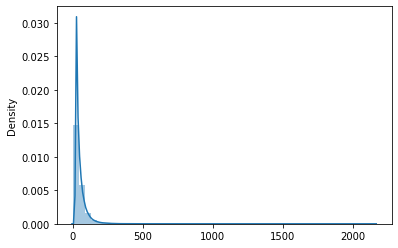

In [ ]:
import seaborn as sns
sns.distplot(before_len)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


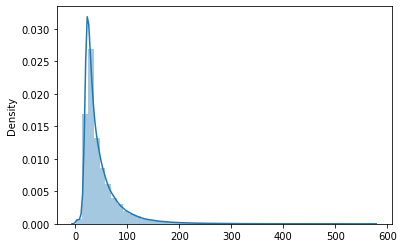

In [ ]:
import seaborn as sns
sns.distplot(after_len)